In [10]:
import pandas as pd
import numpy as np
import unicodedata
import string
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
from utils import *
from sklearn.model_selection import train_test_split


In [39]:
df = pd.read_csv("data/baby_names.csv")
df = df.rename(columns = {"Child's First Name":"Name"})

In [40]:
df["Name"] = df["Name"].apply(str.lower)
df

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,sophia,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,chloe,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,emily,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,olivia,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,emma,75,5
...,...,...,...,...,...,...
11340,2016,FEMALE,BLACK NON HISPANIC,saniyah,10,43
11341,2016,FEMALE,BLACK NON HISPANIC,skye,10,43
11342,2016,FEMALE,BLACK NON HISPANIC,tiana,10,43
11343,2016,FEMALE,BLACK NON HISPANIC,violet,10,43


In [41]:
(df["Name"] == "sophia").values.astype(int).sum()

17

In [42]:
df.groupby(["Name","Ethnicity"]).mean()

Year of Birth      Count       Rank
Name    Ethnicity                                                      
aahil   ASIAN AND PACIFIC ISLANDER         2015.0  12.666667  54.666667
aaliyah BLACK NON HISP                     2012.0  55.000000  10.000000
        BLACK NON HISPANIC                 2013.8  64.400000   4.600000
        HISPANIC                           2013.5  60.000000  32.000000
aarav   ASIAN AND PACI                     2012.0  10.000000  61.000000
...                                           ...        ...        ...
zoey    WHITE NON HISPANIC                 2014.0  20.000000  72.666667
zoya    ASIAN AND PACIFIC ISLANDER         2013.0  16.000000  36.000000
zuri    BLACK NON HISP                     2012.0  10.000000  47.000000
        BLACK NON HISPANIC                 2013.8  21.800000  31.600000
zyaire  BLACK NON HISPANIC                 2011.0  14.000000  60.000000

[4167 rows x 3 columns]

In [43]:
np.unique(df["Ethnicity"].values)

array(['ASIAN AND PACI', 'ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISP',
       'BLACK NON HISPANIC', 'HISPANIC', 'WHITE NON HISP',
       'WHITE NON HISPANIC'], dtype=object)

In [45]:
def replace_ethnicity(name):
    if("BLACK" in name):
        return "AFRICAN"
    if("ASIAN" in name):
        return "ASIAN"
    if("HISP" in name):
        return "HISPANIC"
    return "UNWKNOWN"
np.unique(df["Ethnicity"].apply(replace_ethnicity).values)

array(['AFRICAN', 'ASIAN', 'HISPANIC'], dtype=object)

In [46]:
df["Ethnicity"] = df["Ethnicity"].apply(replace_ethnicity)
df

,Year of Birth,Gender,Ethnicity,Name,Count,Rank
0,2011,FEMALE,ASIAN,sophia,119,1
1,2011,FEMALE,ASIAN,chloe,106,2
2,2011,FEMALE,ASIAN,emily,93,3
3,2011,FEMALE,ASIAN,olivia,89,4
4,2011,FEMALE,ASIAN,emma,75,5
...,...,...,...,...,...,...
11340,2016,FEMALE,AFRICAN,saniyah,10,43
11341,2016,FEMALE,AFRICAN,skye,10,43
11342,2016,FEMALE,AFRICAN,tiana,10,43
11343,2016,FEMALE,AFRICAN,violet,10,43


In [93]:
dfg = df.groupby(["Name","Ethnicity"]).sum().reset_index()
count_total = dfg.groupby('Name')["Count"].sum().rename("Total").reset_index()
count_total

,Name,Total
0,aahil,38
1,aaliyah,737
2,aarav,72
3,aaron,1594
4,aarya,21
...,...,...
1770,zoe,1090
1771,zoey,539
1772,zoya,16
1773,zuri,119


In [115]:
df_total = df.groupby(["Name","Ethnicity"]).sum().reset_index().merge(count_total)

In [116]:
 df_total["Count"]  = df_total["Count"] / df_total["Total"]

<AxesSubplot:>

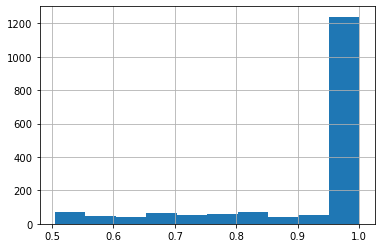

In [134]:
df_total[df_total.Count > 0.50]["Count"].hist()

In [136]:
df_f = df_total[df_total.Count > 0.50][["Ethnicity","Name"]]
df_f

,Ethnicity,Name
0,ASIAN,aahil
1,AFRICAN,aaliyah
3,ASIAN,aarav
6,HISPANIC,aaron
7,ASIAN,aarya
...,...,...
2547,HISPANIC,zoe
2550,HISPANIC,zoey
2551,ASIAN,zoya
2552,AFRICAN,zuri


In [140]:
train_test_split(df_f)

[     Ethnicity       Name
 2071  HISPANIC     reuven
 374   HISPANIC        avi
 2500  HISPANIC      yonah
 2267  HISPANIC       simi
 213    AFRICAN      amiya
 ...        ...        ...
 148   HISPANIC     alissa
 538   HISPANIC  cassandra
 686   HISPANIC     dereck
 1882   AFRICAN       nana
 1220  HISPANIC     jaylee
 
 [1302 rows x 2 columns],
      Ethnicity      Name
 1221  HISPANIC   jayleen
 2200  HISPANIC      sean
 291   HISPANIC     april
 621   HISPANIC    connor
 1929     ASIAN    nikhil
 ...        ...       ...
 2152  HISPANIC  samantha
 2489  HISPANIC     yidel
 2404  HISPANIC   vanessa
 1649  HISPANIC       mae
 2065   AFRICAN     reign
 
 [435 rows x 2 columns]]

In [142]:
train, test = train_test_split(df_f)
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")

In [143]:
!cat data/test.csv

,Ethnicity,Name
1806,HISPANIC,mikaela
1696,HISPANIC,margaret
1850,HISPANIC,montserrat
432,HISPANIC,binyomin
582,AFRICAN,cheyenne
1913,HISPANIC,nelson
706,HISPANIC,dina
2237,HISPANIC,sherlyn
931,HISPANIC,gael
1410,HISPANIC,kaylani
1171,HISPANIC,jana
2096,HISPANIC,rocco
684,HISPANIC,dennis
355,HISPANIC,aubrey
1952,HISPANIC,norah
2307,HISPANIC,stephen
1240,AFRICAN,jelani
855,HISPANIC,etty
1156,HISPANIC,jakub
479,HISPANIC,brooklyn
165,HISPANIC,alter
2469,HISPANIC,yanky
751,HISPANIC,eleanor
263,ASIAN,anisha
1497,HISPANIC,lana
1199,HISPANIC,javier
576,HISPANIC,chaya
549,HISPANIC,cecilia
1614,HISPANIC,lucas
2510,HISPANIC,zabdiel
222,ASIAN,anabia
2332,AFRICAN,taliyah
2079,HISPANIC,rifka
1679,HISPANIC,malika
2243,HISPANIC,shimon
47,ASIAN,aditya
516,HISPANIC,camila
1791,HISPANIC,mia
846,HISPANIC,ester
1018,HISPANIC,harrison
997,HISPANIC,haley
329,HISPANIC,arturo
443,HISPANIC,bracha
309,HISPANIC,arianny
2230,HISPANIC,shaya
2504,HISPANIC,yousef
1443,HISPANIC,kevin
343,AFRICAN,ashton
607,HISPANIC,c

# Deuxième dataset 

In [2]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

category_lines = {}
all_categories = []

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [8]:
L = {
    "Name":[],
    "Class":[]
}
for k in category_lines:
    for name in category_lines[k]:
        L["Name"].append(name)
        L["Class"].append(k)
df = pd.DataFrame(L)
df

,Name,Class
0,Abel,French
1,Abraham,French
2,Adam,French
3,Albert,French
4,Allard,French
...,...,...
20069,Daher,Arabic
20070,Awad,Arabic
20071,Malouf,Arabic
20072,Mustafa,Arabic


In [11]:
train, test = train_test_split(df)
train.to_csv("data/train2.csv")
test.to_csv("data/test2.csv")